# TO DO
- Check if tweet has been made befor the creation date of the user account
- Decide the structure of this notebook (maybe current one could be too much rigid

In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to print multiple outputs from the same cell

import math
import utils
import shutil as shl
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

from datetime import datetime

In [26]:
#shl.unpack_archive("dataset/users.zip", "dataset") # unpacks the users.zip into the datasets folder (The users zip is small enough to be commited to github if we would like)
#shl.unpack_archive("dataset/tweets.zip", "dataset") # unpacks the tweets.zip into the datasets folder

In [27]:
#tweets_df = pd.read_csv("dataset/tweets_small.csv")
tweets_df = pd.read_csv("dataset/tweets.csv")
tweets_df.head()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [28]:
from operator import index


users_df = pd.read_csv("dataset/users.csv")
#users_df.reset_index()
users_df.head()

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


# Data Understanding

As you can see from comparing the table above and the function results below, we already have noticed that some values are not as expected. For example all the attributes below are states as objects, but we expect many of them to be numbers. This suggests that we will have to prepare and clean the data thouroghly before they can be used.

## Tweets data

### Assessing data quality

In [29]:
#tweets_df.dtypes # Redundant if you look at the next command?

In [30]:
tweets_df.info(verbose=True, show_counts=True, memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              13664694 non-null  object
 1   user_id         13447413 non-null  object
 2   retweet_count   13227562 non-null  object
 3   reply_count     13016818 non-null  object
 4   favorite_count  13017154 non-null  object
 5   num_hashtags    12607172 non-null  object
 6   num_urls        13016073 non-null  object
 7   num_mentions    12810531 non-null  object
 8   created_at      13664696 non-null  object
 9   text            13126975 non-null  object
dtypes: object(10)
memory usage: 8.9 GB


In [31]:
tweets_df.isnull().any() #df[df[0] is None]

id                 True
user_id            True
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text               True
dtype: bool

From the method above we observe that all our atributes except for "created_at" have one or more elements with null values.

In [32]:
"""
wrong_ids = []
for (i,k) in enumerate(df["id"]):
    if not isinstance(k, str) or not k.isnumeric():
        wrong_ids.append(i)
print(len(wrong_ids)/len(df["id"]))
""" 

'\nwrong_ids = []\nfor (i,k) in enumerate(df["id"]):\n    if not isinstance(k, str) or not k.isnumeric():\n        wrong_ids.append(i)\nprint(len(wrong_ids)/len(df["id"]))\n'

### Distribution of variables and statistics
Let's study them!

In [33]:
# should we use sturgen rule for number of bins?

# give error: ValueError: hist method requires numerical or datetime columns, nothing to plot.
#tweets_df.hist(column=["reply_count","retweet_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"])

In [34]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
count,13664694,13447413,13227562,13016818,13017154,12607172,13016073,12810531,13664696,13126975
unique,11672135,222285,229167,158619,158763,104779,157145,131538,8127084,6778478
top,dmy,497404180,0,0,0,0,0,0,2020-04-04 03:43:02,"Ci sedemmo dalla parte del torto, visto che tu..."
freq,14,4600,9419784,11790440,9467209,10470209,9894198,7561627,133,6932


### Variables trasformations (?)

### Pairwise correlations

## Users Data

### Assessing and fixing data quality

In [35]:
users_df.dtypes # Redundant if you look at the next command?

id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [36]:
users_df.info(verbose=True, show_counts=True, memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5 MB


We observe that the created_at coloumn is recognized by pandas as an object, and not as a datetime as we would expect from this attribute. We check the values for null values.

In [51]:
users_df.isnull().any() #df[df[0] is None]

id                False
name               True
lang              False
bot               False
created_at        False
statuses_count     True
dtype: bool

In [52]:
type(users_df["created_at"][3])
users_df["created_at"] = pd.to_datetime(users_df["created_at"])
users_df.info()

pandas._libs.tslibs.timestamps.Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  int64         
 1   name            11507 non-null  object        
 2   lang            11508 non-null  object        
 3   bot             11508 non-null  int64         
 4   created_at      11508 non-null  datetime64[ns]
 5   statuses_count  11109 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 539.6+ KB


let's see the unique number of ids and the actual number of ids...

In [38]:
num_unique_ids = len(pd.unique(users_df["id"]))
num_ids = len(users_df["id"])
print(f"number of unique IDs: {num_unique_ids} and number of IDs: {num_ids}")

number of unique IDs: 11508 and number of IDs: 11508


we could do a similar operation for the names, but people with the same name is not an error. For names it is more interesting to know how many values are missing in total.

In [39]:
def my_isnan(a):
    return a != a

def my_isempty(a):
    if a == "":
        return True


number_of_total_names = len(users_df["name"])
not_empty_or_missing_names = []
empty_or_missing_names = []
names_with_only_spaces = []

for value in users_df["name"]:
    if str(value).strip() == "":
            names_with_only_spaces.append(value)
            #users_df["name"].drop(index=value)
    elif not(my_isnan(value) or my_isempty(value)):
        #print(users_df["name"])
        #print(users_df["name"].index(value))
        not_empty_or_missing_names.append(value)
print(f" Number of total names = {number_of_total_names} vs total name values that are not NA or empty = {len(not_empty_or_missing_names)}")

for value in users_df["name"]:
    if my_isnan(value) or my_isempty(value):
        #print(users_df["name"])
        #print(users_df["name"].index(value))
        empty_or_missing_names.append(value)
        #users_df["name"].drop(index=value)
    #else:
    #    not_empty_or_missing_names.append(value)
print(f" Number of total names = {number_of_total_names} vs total name values that are NA or empty = {len(empty_or_missing_names)}")

#print(len(names_with_only_spaces))
#print(empty_or_missing_names)
#print(not_empty_or_missing_names)
#array_of_nan = np.isnan(users_df["name"])

users_df["name"][1012]
users_df["name"][0]
empty_or_missing_names


 Number of total names = 11508 vs total name values that are not NA or empty = 11507
 Number of total names = 11508 vs total name values that are NA or empty = 1


'ㅤ ㅤ ㅤ ㅤ ㅤ ㅤ ㅤ ㅤㅤㅤㅤㅤ'

'Lamonica Raborn'

[nan]

Let's see unique values for lang (maybe we can find something to clean)

In [40]:
pd.unique(users_df["lang"])

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

To me it looks like IETF language codes (https://en.wikipedia.org/wiki/IETF_language_tag), so maybe we can corrects the errors (e.g. "Select Language")

bot: should be yes or no; maybe there are wrong values?

In [41]:
pd.unique(users_df["bot"])

array([1, 0], dtype=int64)

"created at" should be a time; check if there are type error or if time value is strange (e.g. tweet made before twitter release, which was march 21 2006)

In [42]:
# checks if all the datetime strings are in the valid format (YY-mm-dd H:M:S)
expected_format = "%Y-%m-%d %H:%M:%S"
is_datetime_format_correct = lambda x: utils.is_datetime_format_correct(x, expected_format)
all(map(is_datetime_format_correct, users_df["created_at"]))

# checks if all the tweets were created after the first tweet published on twitter (so we don't have something strange like a tweet created in 01-01-1990)
twitter_first_tweet_datetime = datetime(2006,3,21,12,50,0)
string_to_datetime = lambda string: datetime.strptime(string, expected_format)
published_after_twitter_first_tweet = lambda x: string_to_datetime(x) > twitter_first_tweet_datetime
all(map(published_after_twitter_first_tweet, users_df["created_at"]))

True

True

### Distribution of variables and statistics
Let's study them!

In [43]:
users_df.describe(include="all")

,id,name,lang,bot,created_at,statuses_count
count,1.150800e+04,11507,11508,11508.000000,11508,11109.000000
unique,NaN,11360,26,NaN,11423,NaN
top,NaN,Sara,en,NaN,2017-06-25 15:33:05,NaN
freq,NaN,7,9970,NaN,5,NaN
mean,1.274517e+09,NaN,NaN,0.531456,NaN,5883.312359
std,9.354135e+08,NaN,NaN,0.499031,NaN,19073.007305
min,6.780330e+05,NaN,NaN,0.000000,NaN,0.000000
25%,4.663594e+08,NaN,NaN,0.000000,NaN,41.000000
50%,1.128643e+09,NaN,NaN,1.000000,NaN,68.000000
75%,2.357148e+09,NaN,NaN,1.000000,NaN,2916.000000


array([[<AxesSubplot: title={'center': 'statuses_count'}>]], dtype=object)

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

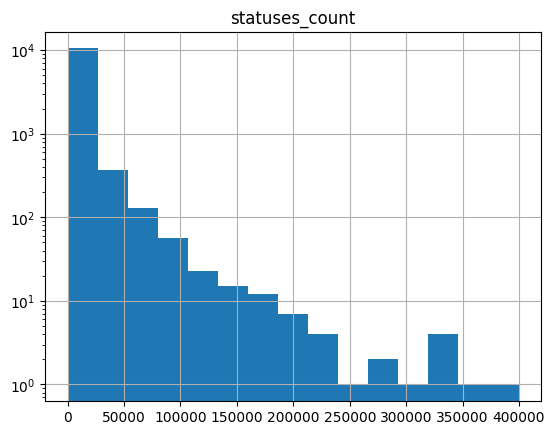

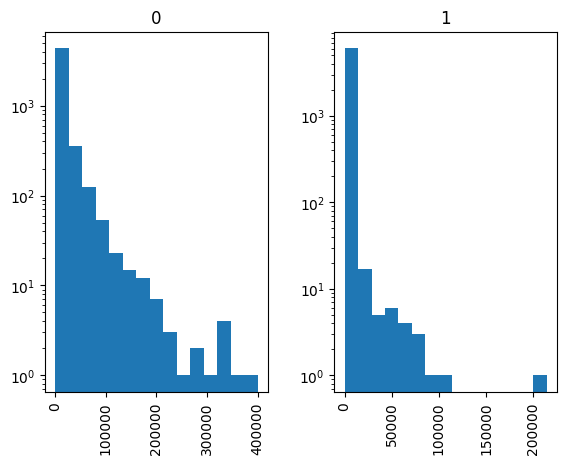

In [44]:
users_df.hist(
    column=["statuses_count"], 
    log=True, 
    bins=utils.get_sturges_bins(len(users_df["statuses_count"]))
)

users_df.hist(
    column=["statuses_count"], 
    by="bot", 
    log=True,
    bins=utils.get_sturges_bins(len(users_df["statuses_count"])) #FIX THIS: USES ALL THE SAMPLES, NOT JUST THE BOTS AND THE USERS
)

# bar plot for language

#sns.barplot(users_df, x="lang")